In [2]:
# Step 1: Import required libraries
import pandas as pd

# Step 2: Load the dataset from the given file path
file_path = r"C:\Users\hp\OneDrive\Desktop\loan_approval_dataset.csv"
df = pd.read_csv(file_path)

# Step 3: Check the shape and preview the dataset
print(f"Dataset loaded successfully!")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Clean column names
df.columns = df.columns.str.strip()

# Now check again
print(df.columns)


Dataset loaded successfully!
Number of rows: 4269, Number of columns: 13

First 5 rows of the dataset:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000

C:\Users\hp\AppData\Local\Temp\ipykernel_13940\1306554924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, palette="viridis")


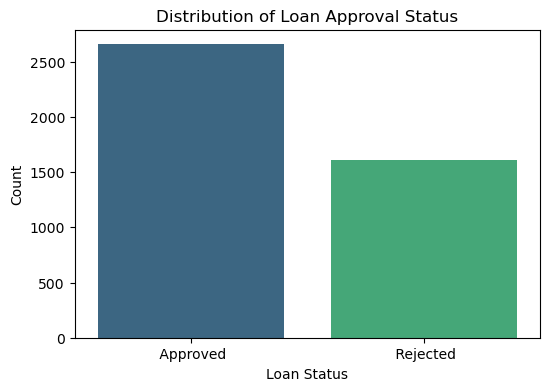

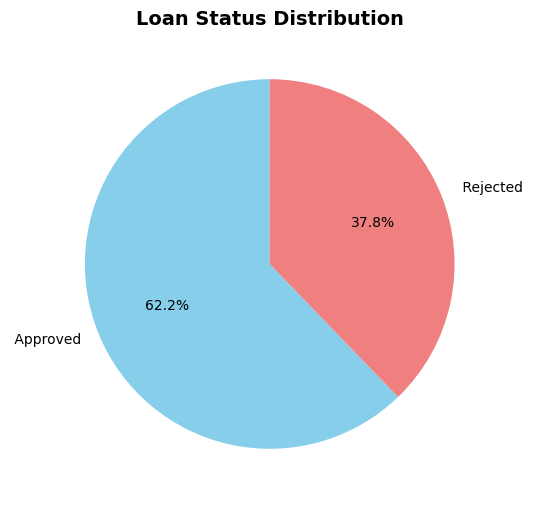

In [3]:
# Step 1: Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Plot the frequency of each Loan Status category
plt.figure(figsize=(6,4))   # optional: adjust figure size
sns.countplot(x="loan_status", data=df, palette="viridis")

# Step 3: Add title and show the plot
plt.title("Distribution of Loan Approval Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show() 


# proportion of applicants in each loan_status
import matplotlib.pyplot as plt

# Count loan status values
loan_status_counts = df["loan_status"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    loan_status_counts,
    labels=loan_status_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["skyblue", "lightcoral"]
)

plt.title("Loan Status Distribution", fontsize=14, fontweight="bold")
plt.show()


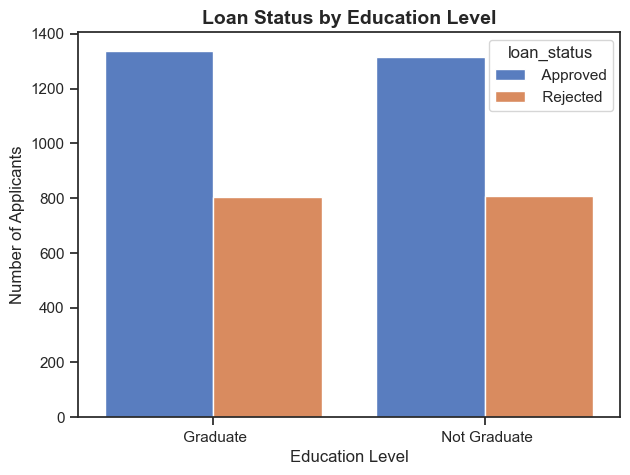

In [4]:
# Step 2: Set the theme and define figure size
sns.set_theme(style="ticks")
plt.figure(figsize=(7,5))

# Step 3: Plot Education levels against Loan Status
sns.countplot(
    x="education", 
    hue="loan_status", 
    data=df, 
    palette="muted"
)

# Step 4: Add chart title and axis labels
plt.title("Loan Status by Education Level", fontsize=14, fontweight="bold")
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)

# Step 5: Display the plot
plt.show()

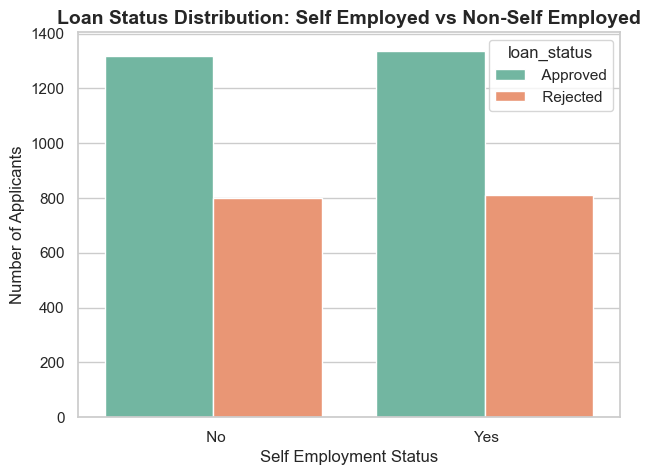

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Apply theme and set figure size
sns.set_theme(style="whitegrid")   # Changed theme to 'whitegrid'
plt.figure(figsize=(7,5))

# Step 2: Plot comparison of Loan Status by Self Employment status
sns.countplot(
    x="self_employed", 
    hue="loan_status", 
    data=df, 
    palette="Set2"   # Changed palette to 'Set2'
)

# Step 3: Add descriptive title and labels
plt.title("Loan Status Distribution: Self Employed vs Non-Self Employed", fontsize=14, fontweight="bold")
plt.xlabel("Self Employment Status", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)

# Step 4: Display chart
plt.show()


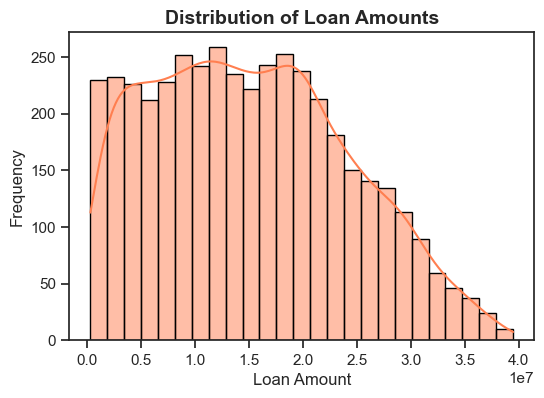

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Set theme for visualization
sns.set_theme(style="ticks")

# Step 2: Plot histogram with KDE for Loan Amount
plt.figure(figsize=(6,4))
sns.histplot(
    df["loan_amount"], 
    kde=True, 
    color="coral",     # changed color
    bins=25,           # adjusted bins for variation
    edgecolor="black"
)

# Step 3: Add chart title and axis labels
plt.title("Distribution of Loan Amounts", fontsize=14, fontweight="bold")
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Step 4: Display the plot
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_13940\1309262923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='commercial_assets_value', data=df, palette='Set3')


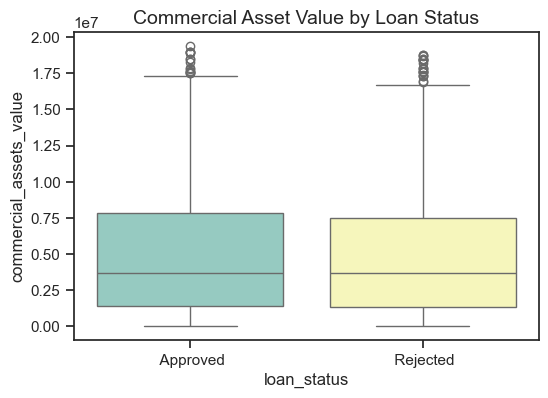

In [7]:
# . Commercial Asset Value vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='commercial_assets_value', data=df, palette='Set3')
plt.title("Commercial Asset Value by Loan Status", fontsize=14)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_13940\3649430690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='luxury_assets_value', data=df, palette='coolwarm')


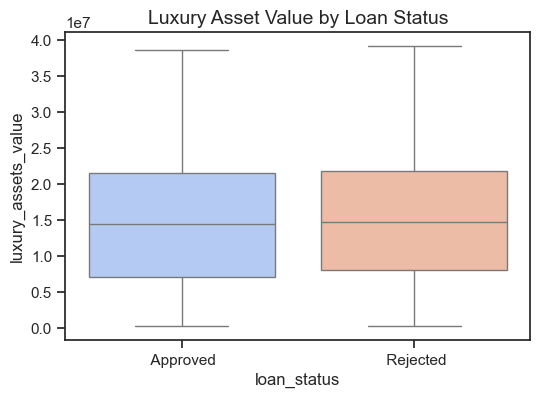

In [8]:
#  Luxury Asset Value vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='luxury_assets_value', data=df, palette='coolwarm')
plt.title("Luxury Asset Value by Loan Status", fontsize=14)
plt.show()

In [9]:
###“If income increases by 20%, how will loan approval probability change?” 

  #🔹 Step 1: Train a model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Copy dataset
data = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# Features & target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [10]:
# 🔹 Step 2: Simulate income increase by 20%


# Baseline predictions
baseline_pred = model.predict_proba(X_test)[:,1].mean()
print("Baseline Approval Probability:", round(baseline_pred, 3))

# Increase annual income by 20%
X_test_income_up = X_test.copy()
X_test_income_up['income_annum'] = X_test_income_up['income_annum'] * 1.2

# Predictions after income increase
income_up_pred = model.predict_proba(X_test_income_up)[:,1].mean()
print("Approval Probability after 20% Annual Income Increase:", round(income_up_pred, 3))

# Difference in approval probability
print("Change in Approval Probability:", round(income_up_pred - baseline_pred, 3))


Baseline Approval Probability: 0.372
Approval Probability after 20% Annual Income Increase: 0.378
Change in Approval Probability: 0.006


Model trained successfully!


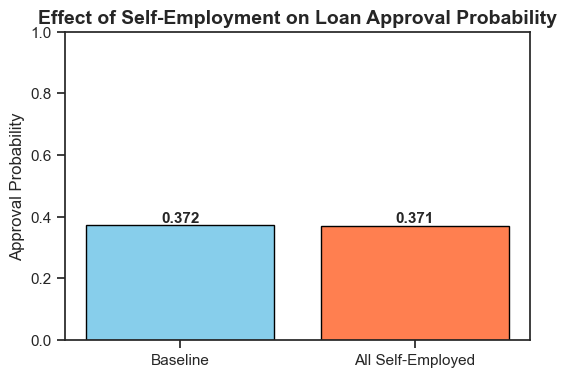

In [27]:
#🔹 Step 1: Train a model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Copy dataset
data = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# Features & target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

###If all applicants were self-employed


import matplotlib.pyplot as plt

# Baseline probability
baseline_pred = model.predict_proba(X_test)[:,1].mean()

# Scenario: All applicants self-employed
X_test_self_employed = X_test.copy()
X_test_self_employed["self_employed"] = 1
self_emp_pred = model.predict_proba(X_test_self_employed)[:,1].mean()

# Plot comparison
labels = ["Baseline", "All Self-Employed"]
values = [baseline_pred, self_emp_pred]

plt.figure(figsize=(6,4))
bars = plt.bar(labels, values, color=["skyblue", "coral"], edgecolor="black")

# Add title and labels
plt.title("Effect of Self-Employment on Loan Approval Probability", fontsize=14, fontweight="bold")
plt.ylabel("Approval Probability", fontsize=12)

# Annotate values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), 
             ha="center", fontsize=11, fontweight="bold")

plt.ylim(0,1)  # keep scale between 0 and 1
plt.show()


Model trained successfully!


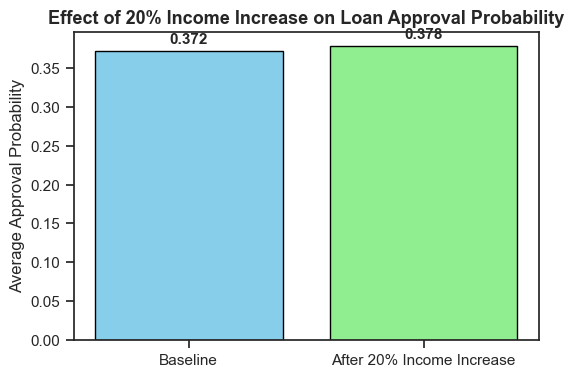

In [24]:
#🔹 Step 1: Train a model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Copy dataset
data = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# Features & target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")


#🔹 Business Question

##“If income increases by 20%, does the approval rate improve?”

import matplotlib.pyplot as plt

# Baseline and new predictions
baseline_pred = model.predict_proba(X_test)[:,1].mean()
X_test_income_up = X_test.copy()
X_test_income_up["income_annum"] = X_test_income_up["income_annum"] * 1.2
income_up_pred = model.predict_proba(X_test_income_up)[:,1].mean()

# Bar chart comparison
plt.figure(figsize=(6,4))
plt.bar(["Baseline", "After 20% Income Increase"], 
        [baseline_pred, income_up_pred], 
        color=["skyblue", "lightgreen"], edgecolor="black")

plt.title("Effect of 20% Income Increase on Loan Approval Probability", fontsize=13, fontweight="bold")
plt.ylabel("Average Approval Probability", fontsize=12)

# Show percentage labels on bars
for i, v in enumerate([baseline_pred, income_up_pred]):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', fontsize=11, fontweight="bold")

plt.show()

